In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

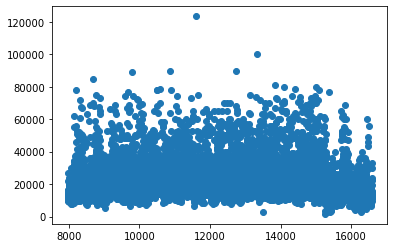

In [3]:
plt.scatter(df.car_id,df.price)
plt.show()

In [4]:
models = pd.unique(df.model)
print(models)

[' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6']


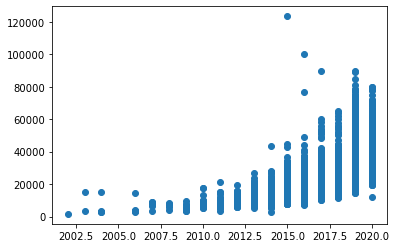

In [5]:
plt.scatter(df.year,df.price)
plt.show()

In [6]:
print(pd.unique(df.transmission))

['Automatic' 'Manual' 'Semi-Auto']


In [7]:
def f(s):
    if s=='Automatic':
        return 2
    elif s=='Manual':
        return 1
    elif s=='Semi-Auto':
        return 3
    else:
        return -1
df.transmission = df.transmission.apply(f)

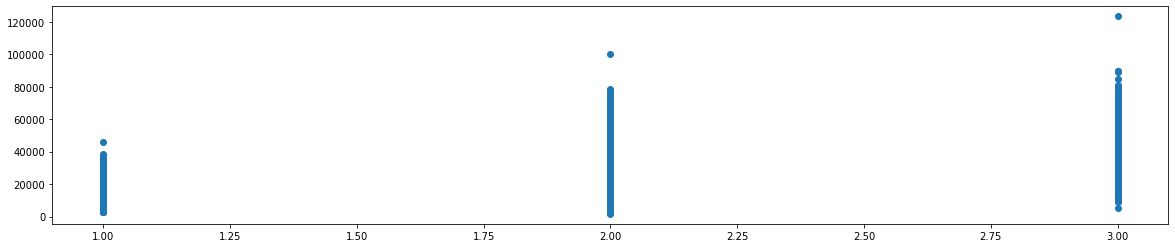

In [8]:
plt.figure().set_figwidth(20)
plt.scatter(df.transmission,df.price)
plt.show()


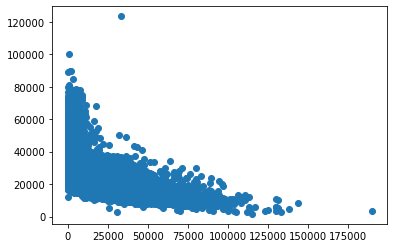

In [9]:
plt.scatter(df.mileage,df.price)
plt.show()

In [10]:
fuels = pd.unique(df.fuelType)
print(fuels)

['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']


In [11]:
def f2(s):
    if s == 'Electric':
        return 1
    if s == 'Other':
        return 2
    if s == 'Diesel':
        return 3
    if s == 'Hybrid':
        return 4
    else:
        return 5
df.fuelType = df.fuelType.apply(f2)


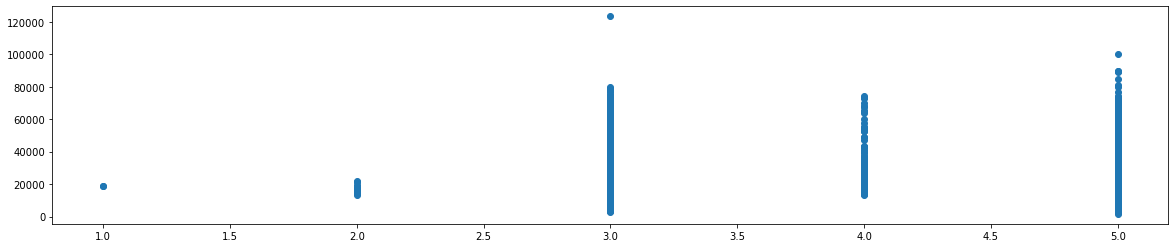

In [12]:
plt.figure().set_figwidth(20)
plt.scatter(df.fuelType,df.price)
plt.show()


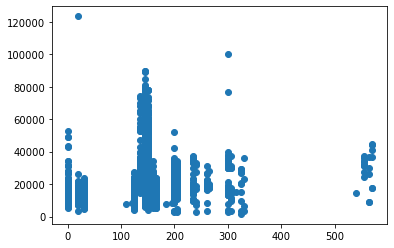

In [13]:
plt.scatter(df.tax,df.price)
plt.show()

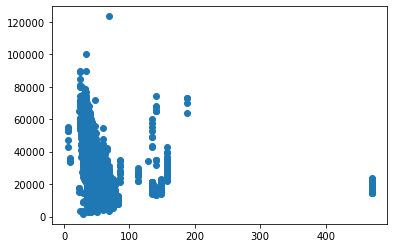

In [14]:
plt.scatter(df.mpg,df.price)
plt.show()

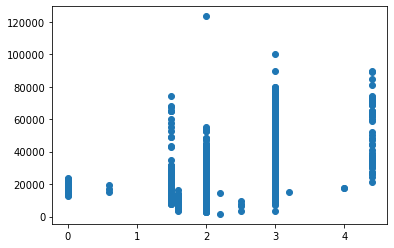

In [15]:
plt.scatter(df.engineSize,df.price)
plt.show()

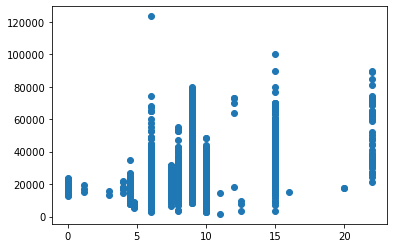

In [16]:
plt.scatter(df.fuelType*df.engineSize,df.price)
plt.show()

In [17]:
df.drop(columns='model',inplace=True)
print(df)

      car_id  year  price  transmission  mileage  fuelType  tax    mpg  \
0       7965  2014  11200             2    67068         3  125   57.6   
1       7966  2018  27000             2    14827         5  145   42.8   
2       7967  2016  16000             2    62794         3  160   51.4   
3       7968  2017  12750             2    26676         3  145   72.4   
4       7969  2014  14500             2    39554         3  160   50.4   
...      ...   ...    ...           ...      ...       ...  ...    ...   
8619   16584  2018  13100             2    33372         5  145   58.9   
8620   16585  2017  19300             2    32867         2    0  470.8   
8621   16586  2017  11400             1    37000         5  125   53.3   
8622   16587  2015  13800             2    29867         3   30   65.7   
8623   16588  2018  14995             2    13889         5  145   55.4   

      engineSize  
0            2.0  
1            2.0  
2            3.0  
3            1.5  
4            3.0

In [18]:
print(df.dtypes)

car_id            int64
year              int64
price             int64
transmission      int64
mileage           int64
fuelType          int64
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [19]:
y = df.price
print(y)

0       11200
1       27000
2       16000
3       12750
4       14500
        ...  
8619    13100
8620    19300
8621    11400
8622    13800
8623    14995
Name: price, Length: 8624, dtype: int64


In [20]:
x = df.loc[:,df.columns!='price']
print(x)

      car_id  year  transmission  mileage  fuelType  tax    mpg  engineSize
0       7965  2014             2    67068         3  125   57.6         2.0
1       7966  2018             2    14827         5  145   42.8         2.0
2       7967  2016             2    62794         3  160   51.4         3.0
3       7968  2017             2    26676         3  145   72.4         1.5
4       7969  2014             2    39554         3  160   50.4         3.0
...      ...   ...           ...      ...       ...  ...    ...         ...
8619   16584  2018             2    33372         5  145   58.9         1.5
8620   16585  2017             2    32867         2    0  470.8         0.6
8621   16586  2017             1    37000         5  125   53.3         1.5
8622   16587  2015             2    29867         3   30   65.7         2.0
8623   16588  2018             2    13889         5  145   55.4         1.5

[8624 rows x 8 columns]


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection


In [22]:
df['e^year'] = np.exp(df['year']-2000)
print(df['e^year'])

0       1.202604e+06
1       6.565997e+07
2       8.886111e+06
3       2.415495e+07
4       1.202604e+06
            ...     
8619    6.565997e+07
8620    2.415495e+07
8621    2.415495e+07
8622    3.269017e+06
8623    6.565997e+07
Name: e^year, Length: 8624, dtype: float64


In [23]:
df.drop(columns='year',inplace=True)
print(df.columns)

Index(['car_id', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'e^year'],
      dtype='object')


In [24]:
print(df.dtypes)

car_id            int64
price             int64
transmission      int64
mileage           int64
fuelType          int64
tax               int64
mpg             float64
engineSize      float64
e^year          float64
dtype: object


In [25]:
df['e^1/mileage']=np.exp(1/df.mileage)
print(df['e^1/mileage'])

0       1.000015
1       1.000067
2       1.000016
3       1.000037
4       1.000025
          ...   
8619    1.000030
8620    1.000030
8621    1.000027
8622    1.000033
8623    1.000072
Name: e^1/mileage, Length: 8624, dtype: float64


In [26]:
print(df.dtypes)
df.drop(columns='mileage',inplace=True)
print(df.dtypes)

car_id            int64
price             int64
transmission      int64
mileage           int64
fuelType          int64
tax               int64
mpg             float64
engineSize      float64
e^year          float64
e^1/mileage     float64
dtype: object
car_id            int64
price             int64
transmission      int64
fuelType          int64
tax               int64
mpg             float64
engineSize      float64
e^year          float64
e^1/mileage     float64
dtype: object


In [27]:
y = df.price
print(y)

0       11200
1       27000
2       16000
3       12750
4       14500
        ...  
8619    13100
8620    19300
8621    11400
8622    13800
8623    14995
Name: price, Length: 8624, dtype: int64


In [28]:
z = df.car_id
print(z)

0        7965
1        7966
2        7967
3        7968
4        7969
        ...  
8619    16584
8620    16585
8621    16586
8622    16587
8623    16588
Name: car_id, Length: 8624, dtype: int64


In [30]:
df.drop(columns=['price'],inplace=True)
x = df.iloc[:,:]
print(x)

      car_id  transmission  fuelType  tax    mpg  engineSize        e^year  \
0       7965             2         3  125   57.6         2.0  1.202604e+06   
1       7966             2         5  145   42.8         2.0  6.565997e+07   
2       7967             2         3  160   51.4         3.0  8.886111e+06   
3       7968             2         3  145   72.4         1.5  2.415495e+07   
4       7969             2         3  160   50.4         3.0  1.202604e+06   
...      ...           ...       ...  ...    ...         ...           ...   
8619   16584             2         5  145   58.9         1.5  6.565997e+07   
8620   16585             2         2    0  470.8         0.6  2.415495e+07   
8621   16586             1         5  125   53.3         1.5  2.415495e+07   
8622   16587             2         3   30   65.7         2.0  3.269017e+06   
8623   16588             2         5  145   55.4         1.5  6.565997e+07   

      e^1/mileage  
0        1.000015  
1        1.000067  
2  

In [31]:
x1,x2,y1,y2 = model_selection.train_test_split(x,y,random_state=0)
# z1,z2,y1,y2 = model_selection.train_test_split(z,y,random_state=0)

In [32]:
alg = LinearRegression()

In [33]:
alg.fit(x1,y1)

LinearRegression()

In [34]:
y_pred_1 = alg.predict(x2)
print(y_pred_1)
print(alg.score(x2,y2))

[15772.51596374 41116.34644637 25629.67277965 ... 30096.80268915
 15340.11908683 29689.2539653 ]
0.5300971235773126
